# Random Forrest / Descision Tree Kernel

In [1]:
import pandas as pd
df_basic_behav = pd.read_csv("factors_and_basic.csv")
df_dummies_ques = pd.read_csv("Complete_df_specific.csv")

# df_basic_behav

### Code column clean up 

In [2]:
df_basic_behav = df_basic_behav[['Age', 'code']]

# cleancolumn = []
Code_series = df_basic_behav["code"]
Code_series = Code_series.apply(lambda x: x.replace('-', '_').lower())
len(Code_series)

df_basic_behav['code'] = Code_series

# df_basic_behav

### merge code column in questions and behavioral age column data 

In [3]:
df_dummies_ques.rename(columns = {'Unnamed: 0.1':'code'}, inplace = True) 
df_basic_ques = df_dummies_ques.merge(df_basic_behav)
df_basic_ques.drop(['Age' , 'code'] , axis = 1)
df_basic_ques = df_basic_ques.drop(['Unnamed: 0'] , axis= 1)
# df_basic_ques

In [4]:
df_basic_ques.shape

(144, 73)

### Prepare X and Y for descision tree on all questions 

In [5]:
X = df_basic_ques.iloc[: , 1:72]

y = df_basic_ques['Age']
y = pd.to_numeric(y, errors='coerce')
df_basic_ques['Age'] = y

df_basic_ques['Age'] = pd.cut(x=df_basic_ques['Age'], bins=[17, 29, 39, 49 , 59 , 69], labels=['20', '30', '40' , '50' , '60'])

y = df_basic_ques['Age']
y = pd.to_numeric(y, errors='coerce')

y = y.values.reshape(-1, 1)


In [6]:
import numpy as np 
# np.unique(y)
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[20 30 40 60] [ 28 105  10   1]


In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Fontconfig error: Cannot load default config file



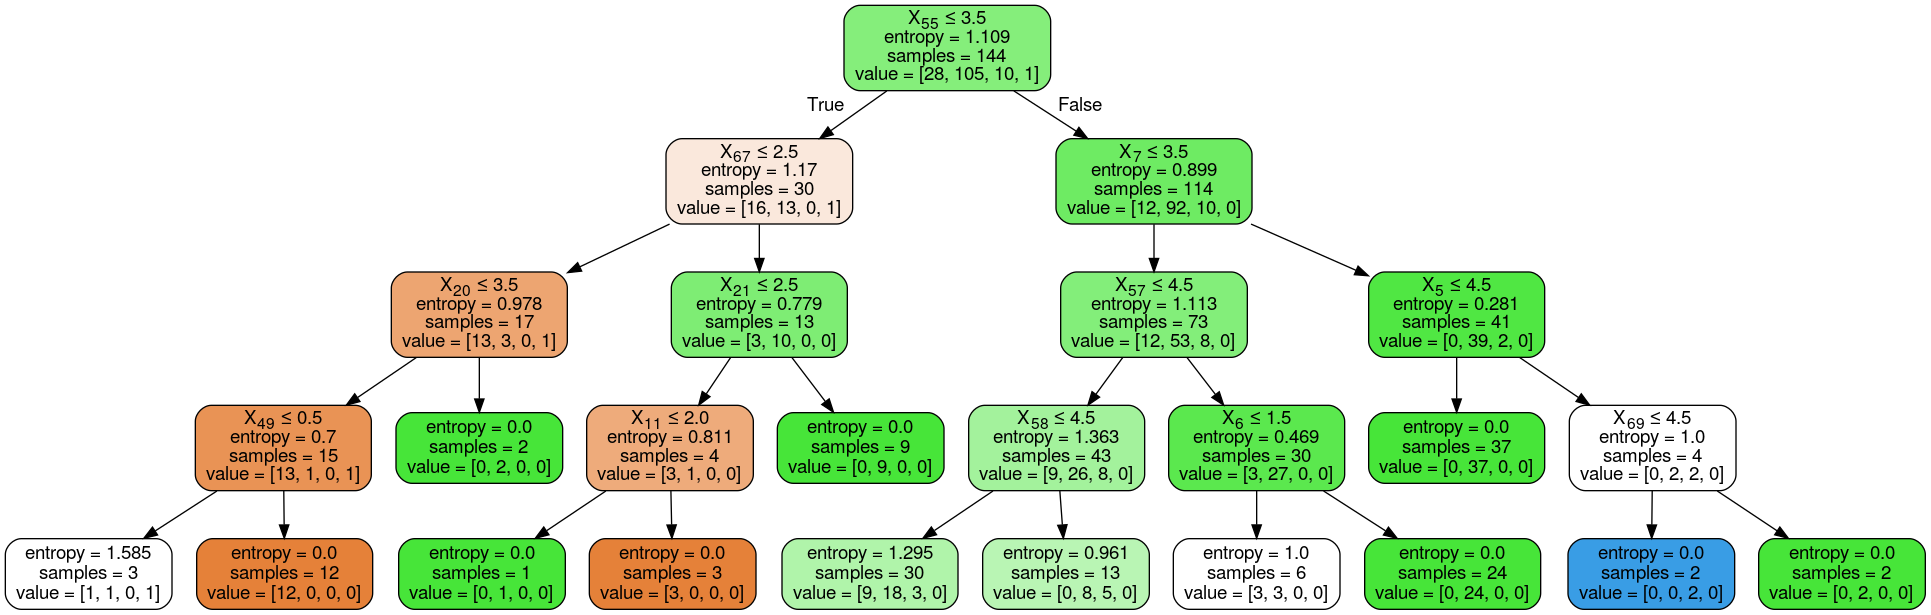

In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
# X

## PCA components

In [10]:
df_merged = pd.read_csv("df_merged_sets.csv")
del df_merged['Unnamed: 0']
df_merged = df_merged.rename(columns = {'Unnamed: 0.1':'code'})
# df_merged

#### prepare x and y for descision tree

In [11]:
df_basic = pd.read_csv("Dataframe_cleaned.csv")
del df_basic['Unnamed: 0']
df_basic = df_basic.rename(columns = {'country_code':'code'})
df_basic = df_basic[['Age' , 'code']]

# cleancolumn = []
Code_series = df_basic["code"]
Code_series = Code_series.apply(lambda x: x.replace('-', '_').lower())
len(Code_series)

df_basic['code'] = Code_series

In [12]:
df_ques_age = df_merged.merge(df_basic)
df_ques_age.head(3)

,code,BXIZZB001V010001,BXIZZB001V010002,BXIZZB001V010003,BXIZZB001V010004,BXIZZB001V010005,BXIZZB001V010006,BXIZZB001V010007,BXIZZB001V010008,BXIZZB001V010009,...,BXIZZB001V010032,BXIZZB001V010033,BXIZZB001V010034,BXIZZB001V010035,BXIZZB001V010036,BXIZZB001V010037,BXIZZB001V010038,BXIZZB001V010039,BXIZZB001V010040,Age
0,ind_1,2,4,4,1,4,0,4,1,3,...,1,4,3,2,2,3,3,5,2,33.0
1,ind_2,5,5,4,5,3,5,0,3,5,...,4,4,4,0,4,4,4,4,4,30.0
2,ind_3,5,1,5,3,3,3,1,3,3,...,3,4,3,3,2,3,3,3,2,31.0


#### make age categorical 

In [13]:
df_ques_age['Age'] = pd.to_numeric(df_ques_age['Age'], errors='coerce')
df_ques_age['Age'] = pd.cut(x=df_ques_age['Age'], bins=[17, 29, 39, 49 , 59 , 69], labels=['20', '30', '40' , '50' , '60'])
print(df_ques_age.index[df_ques_age['Age']=="50"].tolist())
print(df_ques_age.index[df_ques_age['Age']=="40"].tolist())
print(df_ques_age.index[df_ques_age['Age']=="60"].tolist())
df_ques_age = df_ques_age.drop(index = [11, 16, 27, 39, 43, 46, 54, 57, 58, 60 , 8] ).reset_index()

[]
[11, 16, 27, 39, 43, 46, 54, 57, 58, 60]
[8]


In [14]:
# df_ques_age.columns

In [15]:
from sklearn.preprocessing import StandardScaler
df_PCA = df_ques_age.drop(['index' , 'code', 'Age'], axis=1)
X_std = df_PCA.values
x = StandardScaler().fit_transform(X_std)

/home/aayushe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/aayushe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components= 5)
X_transformed = sklearn_pca.fit_transform(x)

In [17]:
principal_behav_Df = pd.DataFrame(data = X_transformed
             , columns = ['PC1', 'PC2','PC3','PC4' ,'PC5'])

In [18]:
principal_behav_Df.tail()

,PC1,PC2,PC3,PC4,PC5
128,-4.793655,-0.781853,-0.561578,1.313830,0.237689
129,0.964785,2.224900,0.163482,-0.130446,-1.562972
130,2.727588,-0.461173,0.695634,2.260047,0.915147
131,-5.957392,2.271077,0.695330,0.418700,1.610692
132,1.321778,0.146941,0.071447,1.300546,0.989103


In [19]:
print('Explained variation per principal component: {}'.format(sklearn_pca.explained_variance_ratio_))

Explained variation per principal component: [0.1458364  0.06578932 0.05220141 0.04763549 0.04040297]


In [20]:
finalDf=pd.concat([principal_behav_Df,df_ques_age[['Age']]],axis=1)
finalDf.dtypes

PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
Age    category
dtype: object

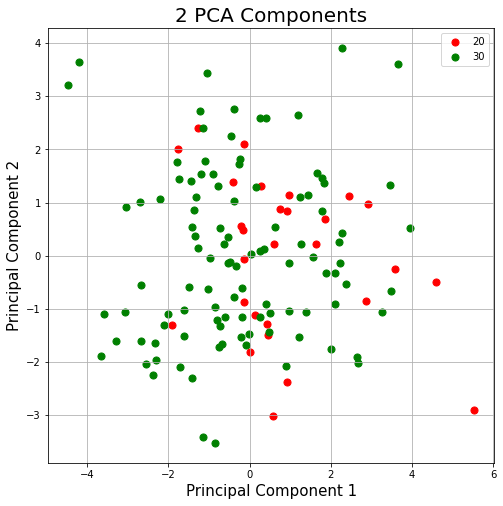

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 PCA Components', fontsize=20)
targets = ['20', '30']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Age'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC2'],
               finalDf.loc[indicesToKeep, 'PC4'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()

### DS on PCA features

In [23]:
X_transformed.shape

(133, 5)

In [24]:
y_age = df_ques_age['Age']
y = pd.to_numeric(y_age, errors='coerce')
y = y.values.reshape(-1, 1)
# y_age

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree2=DecisionTreeClassifier()
dtree2.fit(X_transformed,y_age)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Fontconfig error: Cannot load default config file



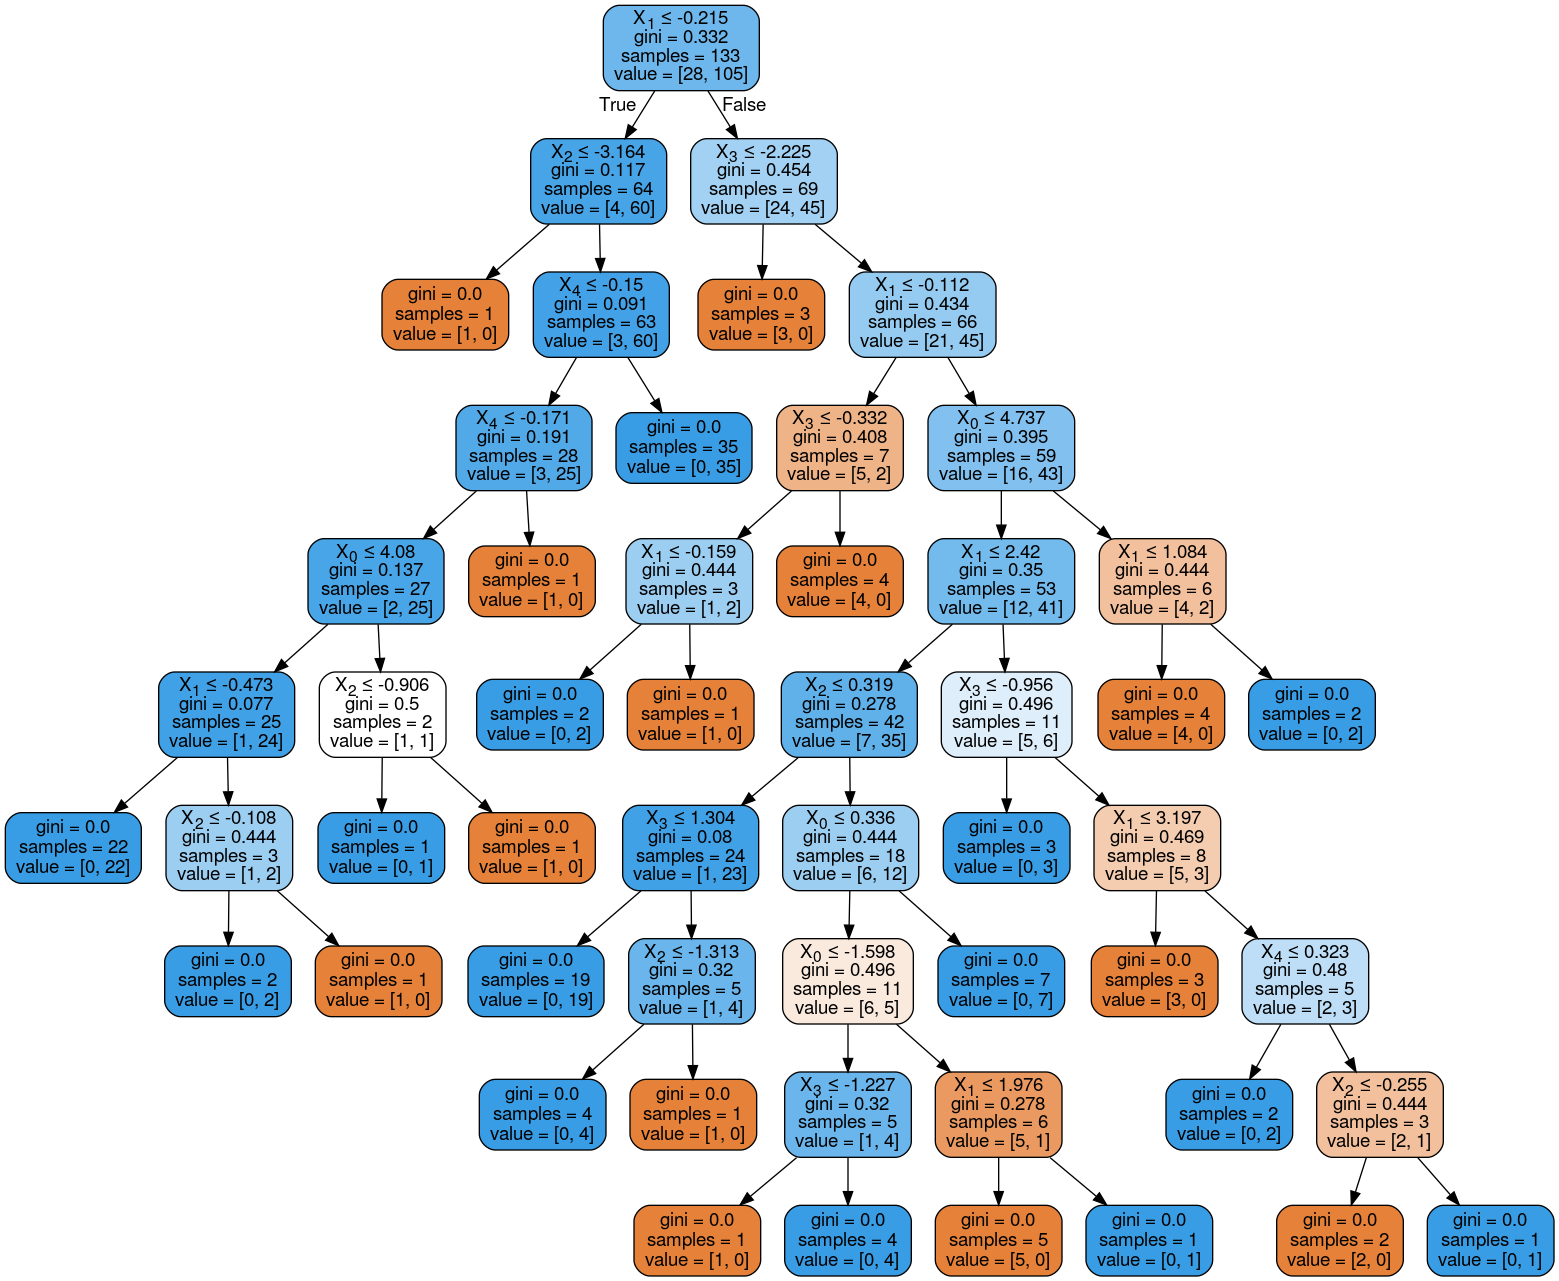

In [26]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())